In [136]:
import numpy as np
import pandas as pd
import random
import copy
import matplotlib.pyplot as plt

time: 16 ms (started: 2022-10-15 17:12:22 +02:00)


In [72]:
%pip install ipython-autotime

Note: you may need to restart the kernel to use updated packages.
time: 4.22 s (started: 2022-10-15 16:18:51 +02:00)


In [73]:
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 16 ms (started: 2022-10-15 16:18:55 +02:00)


In [120]:
colnames = ['x', 'y', 'cost']
TSPA = pd.read_csv('data/TSPA.csv', header=None, sep=';', names=colnames)
TSPB = pd.read_csv('data/TSPB.csv', header=None, sep=';', names=colnames)

time: 16 ms (started: 2022-10-15 17:03:33 +02:00)


In [121]:
TSPA

,x,y,cost
0,1510,353,84
1,3042,123,483
2,2145,389,1462
3,1030,365,1986
4,2125,360,145
...,...,...,...
195,1023,1258,197
196,3192,1271,1183
197,3735,1879,1461
198,3983,299,1309


time: 16 ms (started: 2022-10-15 17:03:34 +02:00)


In [122]:
tspa_dic = TSPA.to_dict('index')
tspb_dic = TSPB.to_dict('index')

time: 0 ns (started: 2022-10-15 17:03:36 +02:00)


In [77]:
# def get_costs(dic):
#     cost_dic = {}
#     for key in dic.keys():
#         cost_dic[key] = dic[key]['cost']
#     return cost_dic

# tspa_costs = get_costs(tspa_dic)
# tspb_costs = get_costs(tspb_dic)

time: 0 ns (started: 2022-10-15 16:18:55 +02:00)


In [78]:
# def get_distances_np(dic):
#     nodes_number = len(dic)
#     distances = np.empty(shape=(nodes_number, nodes_number))
#     for i in range(nodes_number-1):
#         for j in range(i+1, nodes_number):
#             starting_cords = np.array([dic[i]['x'], dic[i]['y']])
#             ending_cords = np.array([dic[j]['x'], dic[j]['y']])
#             dist = round(np.linalg.norm(starting_cords - ending_cords))
#             distances[i][j] = dist
#             distances[j][i] = dist
#     return distances


time: 16 ms (started: 2022-10-15 16:18:55 +02:00)


In [79]:
#get_distances_np(tspa_dic)#

array([[1.46740085e-311, 1.54900000e+003, 6.36000000e+002, ...,
        2.69800000e+003, 2.47400000e+003, 1.15000000e+003],
       [1.54900000e+003, 1.59013285e-023, 9.36000000e+002, ...,
        1.88800000e+003, 9.57000000e+002, 4.53000000e+002],
       [6.36000000e+002, 9.36000000e+002, 1.46760020e-311, ...,
        2.17900000e+003, 1.84000000e+003, 6.00000000e+002],
       ...,
       [2.69800000e+003, 1.88800000e+003, 2.17900000e+003, ...,
        0.00000000e+000, 1.59900000e+003, 2.19000000e+003],
       [2.47400000e+003, 9.57000000e+002, 1.84000000e+003, ...,
        1.59900000e+003, 0.00000000e+000, 1.40900000e+003],
       [1.15000000e+003, 4.53000000e+002, 6.00000000e+002, ...,
        2.19000000e+003, 1.40900000e+003, 0.00000000e+000]])

time: 406 ms (started: 2022-10-15 16:18:56 +02:00)


In [123]:

def calculate_distances(node, data):
    distances = {}
    starting_cords = np.array([node['x'], node['y']])
    for key in data.keys():
        ending_cords = np.array([data[key]['x'], data[key]['y']])
        dist = round(np.linalg.norm(starting_cords - ending_cords))
        distances[key] = dist
    return distances

def calculate_single_distance(starting_node, ending_node):
    starting_cords = np.array([starting_node['x'], starting_node['y']])
    ending_cords = np.array([ending_node['x'], ending_node['y']])
    dist = round(np.linalg.norm(starting_cords - ending_cords))
    return dist

time: 16 ms (started: 2022-10-15 17:03:44 +02:00)


In [124]:
def random_solution(starting_node, data, total_cost, chosen_nodes):
    chosen_nodes.append(starting_node)
    while len(data) > 101:
        start_node = data.pop(starting_node)
        random_node = random.choice(list(data.keys()))
        end_node = data[random_node]
        dist = calculate_single_distance(start_node, end_node)
        total_cost.append(start_node['cost'])
        total_cost.append(dist)
        random_solution(random_node, data, total_cost, chosen_nodes)
    return sum(total_cost), chosen_nodes

time: 0 ns (started: 2022-10-15 17:03:45 +02:00)


In [125]:
def random_solution_iterate(data):
    min_cost = np.inf
    max_cost = 0
    min_cost_nodes = []
    for i in range(len(data)):
        total_cost, chosen_nodes = random_solution(i, copy.deepcopy(data), total_cost = [], chosen_nodes = [])
        if total_cost < min_cost:
            min_cost = total_cost
            min_cost_nodes = chosen_nodes
        if total_cost > max_cost:
            max_cost = total_cost
    print(min_cost)
    print(max_cost)
    print(len(min_cost_nodes))
    print(min_cost_nodes)

random_solution_iterate(tspa_dic)


243786
287104
100
[5, 100, 77, 71, 127, 51, 150, 173, 190, 167, 164, 105, 176, 66, 43, 117, 75, 97, 68, 23, 76, 134, 29, 22, 121, 9, 183, 109, 59, 80, 12, 49, 101, 196, 156, 31, 125, 180, 86, 193, 65, 114, 111, 64, 58, 184, 28, 98, 191, 95, 94, 36, 0, 108, 155, 81, 129, 145, 123, 90, 186, 157, 170, 140, 195, 2, 103, 27, 197, 130, 85, 161, 3, 139, 181, 26, 171, 54, 4, 110, 24, 16, 34, 37, 38, 7, 61, 21, 187, 141, 67, 165, 50, 87, 104, 153, 40, 159, 182, 99]
time: 735 ms (started: 2022-10-15 17:03:47 +02:00)


In [126]:
def nearest_neighbor(starting_node, data, total_cost,chosen_nodes):
    chosen_nodes.append(starting_node)
    while len(data) > 101:
        start_node = data.pop(starting_node)
        distances = calculate_distances(start_node, data)
        key_min = min(distances.keys(), key=(lambda k: distances[k]))
        nearest_node = data[key_min]
        total_cost.append(start_node['cost'])
        total_cost.append(distances[key_min])
        nearest_neighbor(key_min, data, total_cost, chosen_nodes)
    return sum(total_cost), chosen_nodes


time: 0 ns (started: 2022-10-15 17:03:52 +02:00)


In [132]:
def nearest_neighbor_iterate(data):
    min_cost = np.inf
    max_cost = 0
    min_cost_nodes = []
    for i in range(len(data)):
        first_node = data[i]
        total_cost, chosen_nodes = nearest_neighbor(i, copy.deepcopy(data), total_cost = [], chosen_nodes = []) # 
        last_node = data[chosen_nodes[-1]]
        total_cost += calculate_single_distance(last_node, first_node)
        if total_cost < min_cost:
            min_cost = total_cost
            min_cost_nodes = chosen_nodes
        if total_cost > max_cost:
            max_cost = total_cost
    print(min_cost)
    print(max_cost)
    print(min_cost_nodes)
    return min_cost, max_cost, min_cost_nodes


nn_points = nearest_neighbor_iterate(tspa_dic)[2]

108145
125277
[75, 189, 109, 119, 100, 33, 26, 13, 52, 148, 48, 92, 16, 152, 11, 162, 160, 198, 106, 125, 8, 105, 123, 124, 80, 191, 95, 169, 110, 139, 196, 51, 5, 112, 165, 73, 179, 12, 89, 42, 94, 122, 72, 190, 98, 156, 172, 66, 6, 68, 24, 67, 87, 144, 102, 44, 133, 154, 81, 171, 104, 184, 194, 79, 21, 157, 129, 170, 186, 127, 88, 153, 161, 76, 145, 151, 49, 38, 0, 115, 69, 149, 50, 121, 91, 114, 2, 4, 29, 187, 192, 150, 199, 39, 137, 177, 1, 41, 174, 173]
time: 29.9 s (started: 2022-10-15 17:11:04 +02:00)


In [ ]:
def cycle_greedy(starting_node, data, total_cost,chosen_nodes):
    pass

In [133]:
#nn_points

[75,
 189,
 109,
 119,
 100,
 33,
 26,
 13,
 52,
 148,
 48,
 92,
 16,
 152,
 11,
 162,
 160,
 198,
 106,
 125,
 8,
 105,
 123,
 124,
 80,
 191,
 95,
 169,
 110,
 139,
 196,
 51,
 5,
 112,
 165,
 73,
 179,
 12,
 89,
 42,
 94,
 122,
 72,
 190,
 98,
 156,
 172,
 66,
 6,
 68,
 24,
 67,
 87,
 144,
 102,
 44,
 133,
 154,
 81,
 171,
 104,
 184,
 194,
 79,
 21,
 157,
 129,
 170,
 186,
 127,
 88,
 153,
 161,
 76,
 145,
 151,
 49,
 38,
 0,
 115,
 69,
 149,
 50,
 121,
 91,
 114,
 2,
 4,
 29,
 187,
 192,
 150,
 199,
 39,
 137,
 177,
 1,
 41,
 174,
 173]

time: 0 ns (started: 2022-10-15 17:11:37 +02:00)


101
101


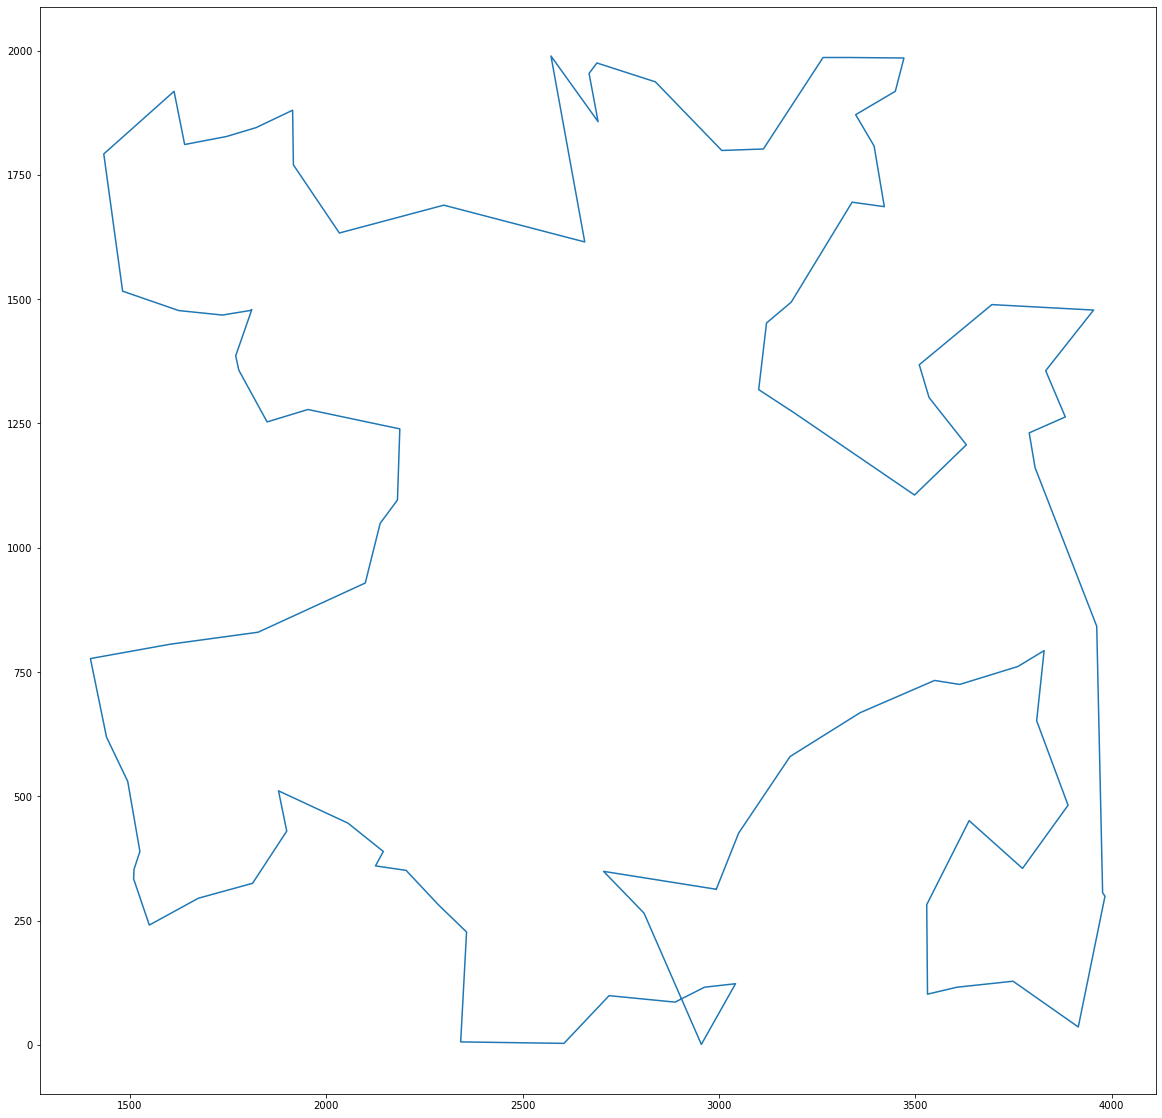

time: 453 ms (started: 2022-10-15 17:55:51 +02:00)


In [188]:
plt.rcParams["figure.figsize"] = (20,20)
# points_x = [tspa_dic[k]['x'] for k in tspa_dic.keys()]
# #points_x.append(points_x[0])
# points_y = [tspa_dic[k]['y'] for k in tspa_dic.keys()]
# #points_y.append(points_y[0])
# costs = [tspa_dic[k]['cost']/25 for k in tspa_dic.keys()]
# #costs.append(costs[0])
# plt.scatter(points_x, points_y, s=costs)
chosen_points_x = [tspa_dic[k]['x'] for k in nn_points]
chosen_points_x.append(chosen_points_x[0])
chosen_points_y = [tspa_dic[k]['y'] for k in nn_points]
chosen_points_y.append(chosen_points_y[0])
costs = [tspa_dic[k]['cost']/25 for k in nn_points]
costs.append(costs[0])
print(len(chosen_points_x))
print(len(costs))
plt.plot(chosen_points_x, chosen_points_y)
#plt.plot([[x, y] for x, y in zip(chosen_points_x, chosen_points_y)])